## HANDWRITTEN DIGIT RECOGNATION

## screen capture

In [1]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/9/"
    for i in range(0,10):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now........")

## generate dataset

In [2]:
import cv2
import csv
import glob

def one_time():
    header  =["label"]
    for i in range(0,784):
        header.append("pixel"+str(i))
    with open('dataset.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(header)

    for label in range(10):
        dirList = glob.glob("captured_images/"+str(label)+"/*.png")

        for img_path in dirList:
            im= cv2.imread(img_path)
            im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
            roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)

            data=[]
            data.append(label)
            rows, cols = roi.shape

            ## Add pixel one by one into data array
            for i in range(rows):
                for j in range(cols):
                    k =roi[i,j]
                    if k>100:
                        k=1
                    else:
                        k=0
                    data.append(k)
            with open('dataset.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow(data)

## Load the dataset

In [3]:
#load the dataset
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
666,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,7,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
735,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## separation of dependent and independent variable

In [4]:
X = data.drop(["label"],axis=1)
Y= data["label"]

## preview of one image using matplotlib

5


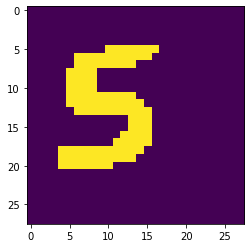

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 531
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

## train-test split 

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

## Fit the model using svc and also to save the model using joblib

In [7]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

## Calculate Accuracy

In [8]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.99


## Prediction of image drawn in paint

In [9]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(60,170,400,500))    
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
    rows,cols=roi.shape
    
    X = []
    
    ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
            
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

Prediction: 0
Prediction: 0
Prediction: 2
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 5
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 5
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 5
Prediction: 0
Prediction: 5
Prediction: 5
Prediction: 4
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 4
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 5
Prediction: 0
Prediction: 0
Prediction: 4
Prediction: 4
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0


KeyboardInterrupt: 